<a href="https://www.kaggle.com/code/vineethmenonk/decision-tree-rsqs-vinitha-data?scriptVersionId=169848771" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Decision Tree Algorithm model on RSQS Data
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinitharsvs2/vinitadataRSQS.csv
/kaggle/input/complete-neumeric-rsqs-vinitha/vinitadataRSQS.csv
/kaggle/input/vinitarsqs/vinitadataRSQS.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
#Declaring data ranage with df 
data = '/kaggle/input/complete-neumeric-rsqs-vinitha/vinitadataRSQS.csv'

df = pd.read_csv(data)

In [5]:
#View Labels  and data samples Top5 and Bottom 5
df.head

<bound method NDFrame.head of      Respondent ID  Collector ID    IP Address  Gender  Age  Education  \
0     114448855803     428249593   22318815990       1    4          4   
1     114448118233     428249593    1221614989       1    3          3   
2     114447822503     428249593   18383209186       1    3          3   
3     114447794242     428249593   22318714180       1    3          4   
4     114447221245     428249593     473123221       0    3          3   
..             ...           ...           ...     ...  ...        ...   
264   114435827967     428249593     473196244       1    2          2   
265   114435827160     428249593     152589227       1    1          2   
266   114435827773     428249593     152581236       1    2          2   
267   114435815800     428249593  106206181214       1    1          1   
268   114434950520     428249593    2232337177       0    4          4   

     Occupation  Household income (per annum in INR)  Marital Status  \
0        

In [6]:
#View Dimension of Data Range Rows, Columns
df.shape


(269, 42)

In [7]:
#Declaring Column headers as df.columns -we can even change column labels here
col_names = ['Respondent ID','Collector ID','IP Address','Gender','Age','Education','Occupation','Household income (per annum in INR)','Marital Status','Please share the name of a store you recently visited.','Kindly rate your experience with this store, you recently visited on a scale of 1 to 5.','This store has modern-looking equipment and fixtures.','Materials associated with this store�s service (such as shopping bags or statements) are visually appealing.','This store has clean, attractive, and convenient public areas.','The store layout at this store makes it easy for customers to find what�s need.','When this store promises to do something by a certain time, it does.','This store provides its services at the time it promises to do so.','This store performs the service right the first time.','This store has merchandise available when the customers want it.','This store insists on error-free sales transactions and records.','Employees at this store have the knowledge to answer customers� questions.','The behavior of employees in this store instills confidence in customers.','Customers feel safe in their transactions with this store.','Employees in this store give prompt service to customers.','Employees in this store tell customers exactly when services will be performed.','Employees in this store are never too busy to respond to customers� requests.','This store gives customers individual attention.','Employees in this store are consistently courteous with customers.','Employees of this store treat customers courteously on the telephone.','This store willingly handles returns and exchanges.','When a customer has a problem, this store is sincerely interested in handling customer complaints directly and immediately.','This store offers high-quality merchandise.','This store provides plenty of convenient parking for its customers.','This store has operating hours convenient to all their customers.','This store accepts most major credit cards.','I�m delighted with overall dealing with the outlet','I�m satisfied with my personal contact with the staff','I�m satisfied with the product service quality of the outlet','I am satisfied with the customer support','I am satisfied with the prices of the products at this store.','My store always meets my satisfaction.','I would recommend the store�s product to others'
]

df.columns = col_names

col_names

['Respondent ID',
 'Collector ID',
 'IP Address',
 'Gender',
 'Age',
 'Education',
 'Occupation',
 'Household income (per annum in INR)',
 'Marital Status',
 'Please share the name of a store you recently visited.',
 'Kindly rate your experience with this store, you recently visited on a scale of 1 to 5.',
 'This store has modern-looking equipment and fixtures.',
 'Materials associated with this store�s service (such as shopping bags or statements) are visually appealing.',
 'This store has clean, attractive, and convenient public areas.',
 'The store layout at this store makes it easy for customers to find what�s need.',
 'When this store promises to do something by a certain time, it does.',
 'This store provides its services at the time it promises to do so.',
 'This store performs the service right the first time.',
 'This store has merchandise available when the customers want it.',
 'This store insists on error-free sales transactions and records.',
 'Employees at this store have

In [8]:
#Find Type of variable in each column like int64,object -In this case all variables contain int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 42 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                       --------------  -----  
 0   Respondent ID                                                                                                                269 non-null    int64  
 1   Collector ID                                                                                                                 269 non-null    int64  
 2   IP Address                                                                                                                   269 non-null    int64  
 3   Gender                                                                                                                  

In [9]:
#Finding out the target variable-also defines as Y which is converted into nominal values for analysis 0,1,2-taken as 0 and 1,2,3 taken as 1
df['I would recommend the store�s product to others'].value_counts()

I would recommend the store�s product to others
1    221
0     48
Name: count, dtype: int64

In [10]:
# Finding out Null VAlues in data set.This needs to be 0
df.isnull().sum()

Respondent ID                                                                                                                  0
Collector ID                                                                                                                   0
IP Address                                                                                                                     0
Gender                                                                                                                         0
Age                                                                                                                            0
Education                                                                                                                      0
Occupation                                                                                                                     0
Household income (per annum in INR)                                                              

In [11]:
#Defining X and Y data set we are dropping 'I would recommend the store�s product to others' frpm X axis and adding it to Y data
X = df.drop(['I would recommend the store�s product to others'], axis=1)

y = df['I would recommend the store�s product to others']

In [12]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
# Finding of Dimnsion of Train data set X
X_train.shape, X_test.shape

((180, 41), (89, 41))

In [14]:
# Finding of Dimnsion of Train data set Y
y_train.shape, y_test.shape

((180,), (89,))

In [15]:
# check data types in X_train

X_train.dtypes

Respondent ID                                                                                                                    int64
Collector ID                                                                                                                     int64
IP Address                                                                                                                       int64
Gender                                                                                                                           int64
Age                                                                                                                              int64
Education                                                                                                                        int64
Occupation                                                                                                                       int64
Household income (per annum in INR)                    

In [16]:
# import category encoders

import category_encoders as ce

In [17]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['Gender','Age','Education','Occupation','Household income (per annum in INR)','Marital Status','Kindly rate your experience with this store, you recently visited on a scale of 1 to 5.','This store has modern-looking equipment and fixtures.','Materials associated with this store�s service (such as shopping bags or statements) are visually appealing.','This store has clean, attractive, and convenient public areas.','The store layout at this store makes it easy for customers to find what�s need.','When this store promises to do something by a certain time, it does.','This store provides its services at the time it promises to do so.','This store performs the service right the first time.','This store has merchandise available when the customers want it.','This store insists on error-free sales transactions and records.','Employees at this store have the knowledge to answer customers� questions.','The behavior of employees in this store instills confidence in customers.','Customers feel safe in their transactions with this store.','Employees in this store give prompt service to customers.','Employees in this store tell customers exactly when services will be performed.','Employees in this store are never too busy to respond to customers� requests.','This store gives customers individual attention.','Employees in this store are consistently courteous with customers.','Employees of this store treat customers courteously on the telephone.','This store willingly handles returns and exchanges.','When a customer has a problem, this store is sincerely interested in handling customer complaints directly and immediately.','This store offers high-quality merchandise.','This store provides plenty of convenient parking for its customers.','This store has operating hours convenient to all their customers.','This store accepts most major credit cards.','I�m delighted with overall dealing with the outlet','I�m satisfied with my personal contact with the staff','I�m satisfied with the product service quality of the outlet','I am satisfied with the customer support','I am satisfied with the prices of the products at this store.','My store always meets my satisfaction.'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,Respondent ID,Collector ID,IP Address,Gender,Age,Education,Occupation,Household income (per annum in INR),Marital Status,Please share the name of a store you recently visited.,...,This store offers high-quality merchandise.,This store provides plenty of convenient parking for its customers.,This store has operating hours convenient to all their customers.,This store accepts most major credit cards.,I�m delighted with overall dealing with the outlet,I�m satisfied with my personal contact with the staff,I�m satisfied with the product service quality of the outlet,I am satisfied with the customer support,I am satisfied with the prices of the products at this store.,My store always meets my satisfaction.
111,114441367247,428249593,1038314911,1,1,1,1,1,1,88,...,1,1,1,1,1,1,1,1,1,1
222,114436664414,428249593,1461963275,2,1,1,1,2,1,39,...,1,2,2,2,2,1,2,2,2,1
148,114438455849,428249593,11598141129,2,1,1,1,1,1,44,...,1,3,2,2,2,1,2,2,2,1
259,114435828447,428249593,15737187203,2,1,1,1,3,1,16,...,2,3,1,1,2,1,3,2,2,2
167,114436777195,428249593,493623958,1,1,1,1,2,1,16,...,2,3,1,2,1,2,2,3,2,2


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 111 to 102
Data columns (total 41 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype
---  ------                                                                                                                       --------------  -----
 0   Respondent ID                                                                                                                180 non-null    int64
 1   Collector ID                                                                                                                 180 non-null    int64
 2   IP Address                                                                                                                   180 non-null    int64
 3   Gender                                                                                                                       180 non-

# Decision Tree Classifier with criterion gini index #

In [20]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [21]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
#Predict the Test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

In [23]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8989


In [24]:
#Compare the train-set and test-set accuracy
#Now, I will compare the train-set and test-set accuracy to check for overfitting.
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])

In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9778
Test set score: 0.8989


**Here, the training-set accuracy score is 0.7865 while the test-set accuracy to be 0.8021. These two values are quite comparable. So, there is no sign of overfitting.**

# Visualize decision-trees

[Text(0.5, 0.875, 'x[38] <= 3.5\ngini = 0.32\nsamples = 180\nvalue = [36, 144]'),
 Text(0.25, 0.625, 'x[40] <= 4.5\ngini = 0.092\nsamples = 145\nvalue = [7, 138]'),
 Text(0.125, 0.375, 'x[39] <= 5.5\ngini = 0.056\nsamples = 139\nvalue = [4, 135]'),
 Text(0.0625, 0.125, 'gini = 0.043\nsamples = 138\nvalue = [3, 135]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.375, 0.375, 'x[25] <= 1.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.625, 'x[37] <= 3.5\ngini = 0.284\nsamples = 35\nvalue = [29, 6]'),
 Text(0.625, 0.375, 'x[32] <= 4.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.375, 'x[28] <= 4.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.8125, 0.125, 'gini = 0.069

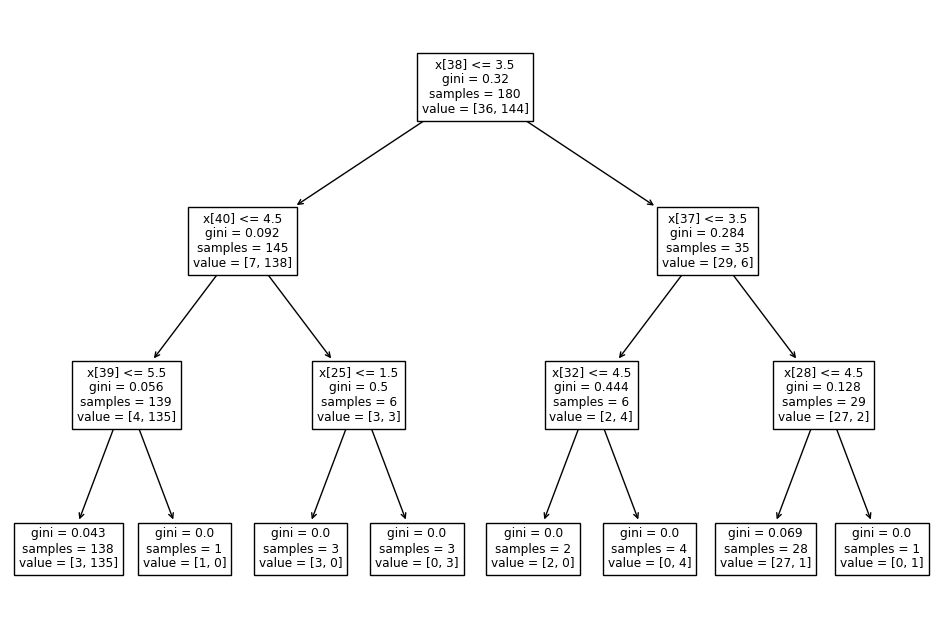

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

**Visualize decision-trees with graphviz**

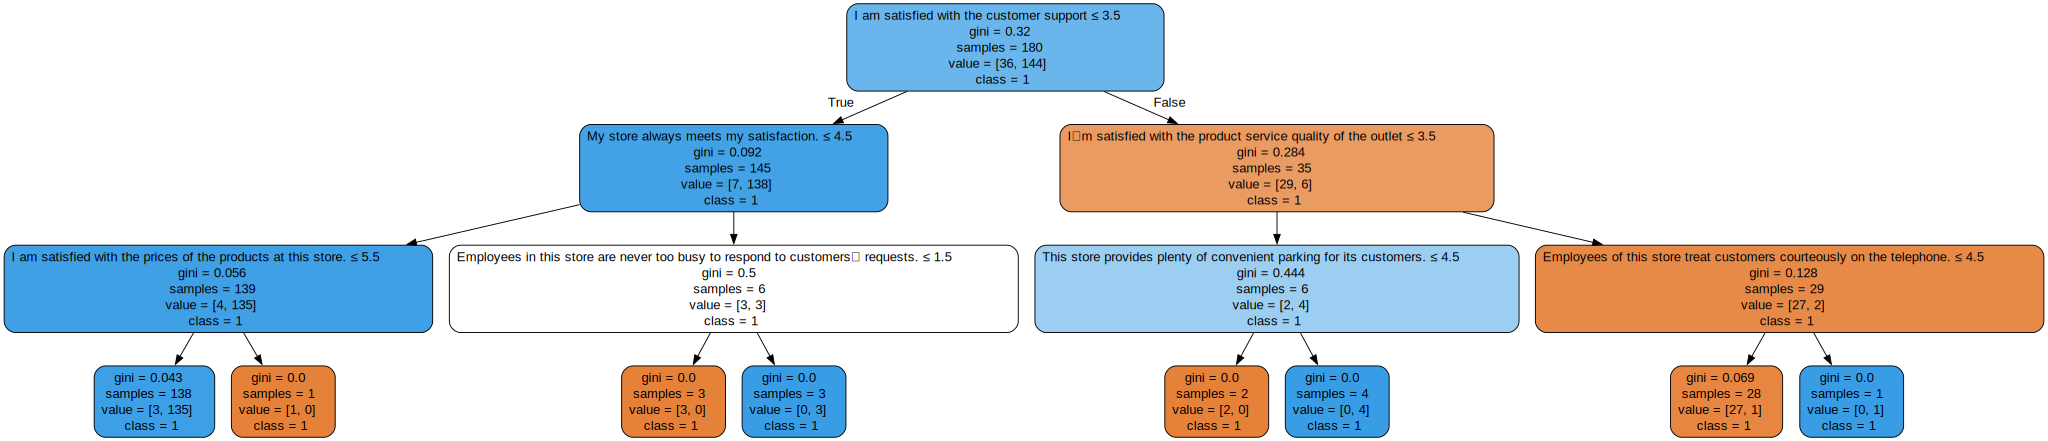

In [27]:
import graphviz
from sklearn import tree  # Import the tree module

# Export the decision tree as DOT format
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=[str(label) for label in y_train],  # Convert y_train labels to strings
                                filled=True, rounded=True,  
                                special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("data_decision_tree")  # This will save the visualization as a file
graph



# Decision Tree Classifier with criterion entropy 

In [28]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [29]:
y_pred_en = clf_en.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.9213


In [31]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1])

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9667


In [33]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))


Training set score: 0.9667
Test set score: 0.9213


These two values are quite comparable. So, there is no sign of overfitting.

**Visualize decision-trees**

[Text(0.5, 0.875, 'x[38] <= 3.5\nentropy = 0.722\nsamples = 180\nvalue = [36, 144]'),
 Text(0.25, 0.625, 'x[40] <= 4.5\nentropy = 0.279\nsamples = 145\nvalue = [7, 138]'),
 Text(0.125, 0.375, 'x[23] <= 4.5\nentropy = 0.188\nsamples = 139\nvalue = [4, 135]'),
 Text(0.0625, 0.125, 'entropy = 0.112\nsamples = 134\nvalue = [2, 132]'),
 Text(0.1875, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [2, 3]'),
 Text(0.375, 0.375, 'x[25] <= 1.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.75, 0.625, 'x[37] <= 3.5\nentropy = 0.661\nsamples = 35\nvalue = [29, 6]'),
 Text(0.625, 0.375, 'x[32] <= 4.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.875, 0.375, 'x[27] <= 1.5\nentropy = 0.362\nsamples = 29\nvalue = [27

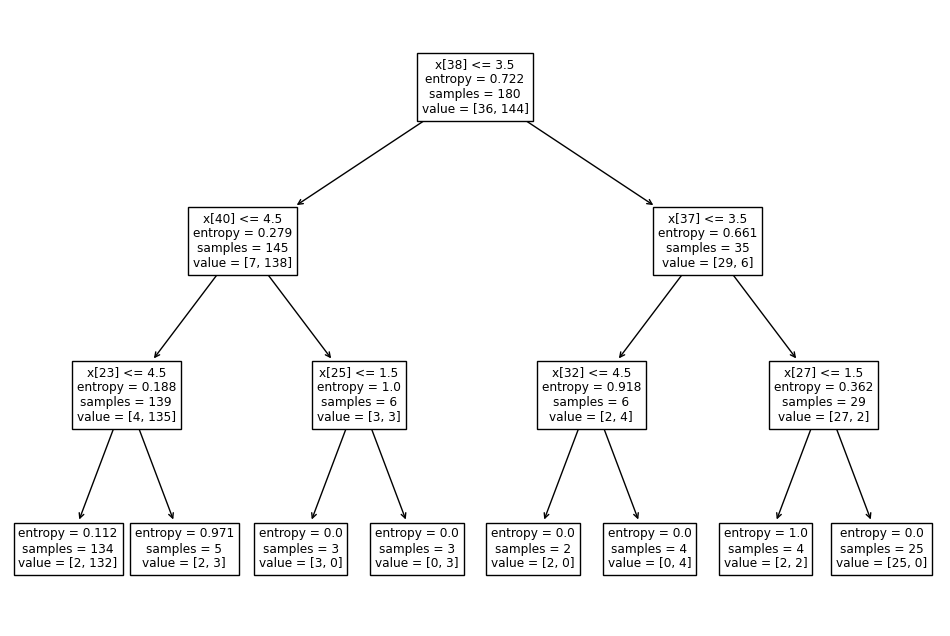

In [34]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

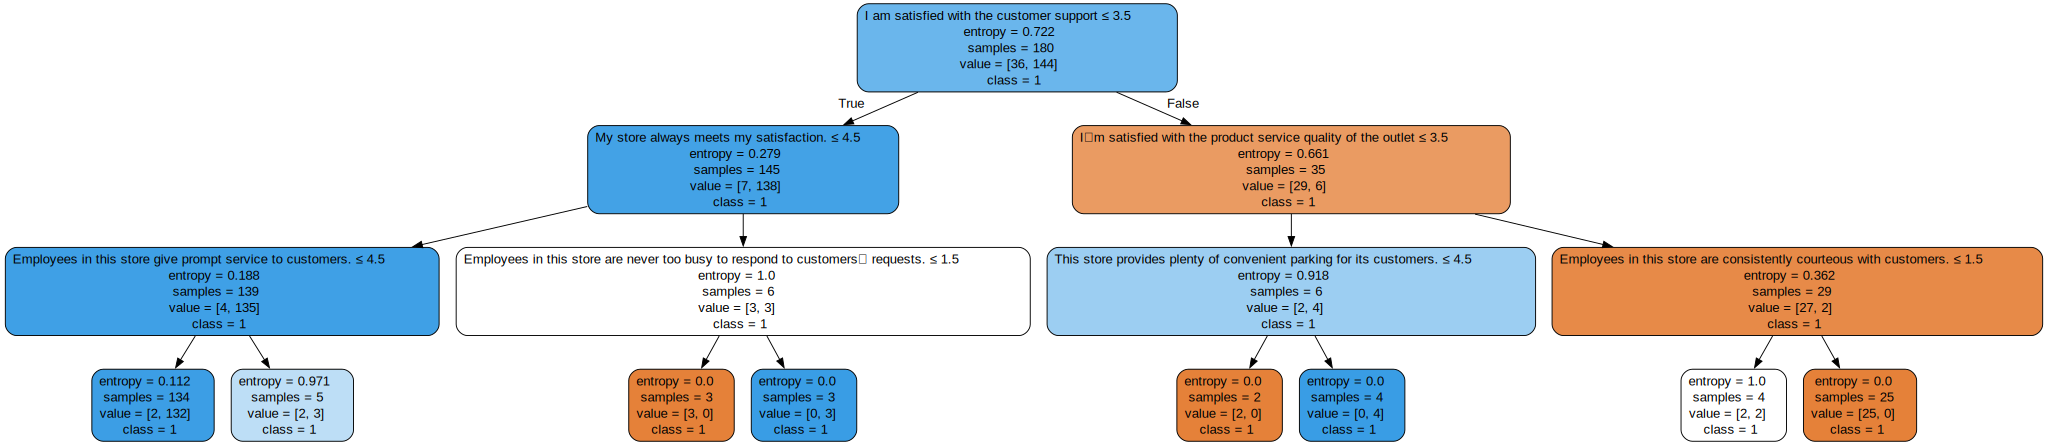

In [35]:
import graphviz
from sklearn import tree
import numpy as np

# Convert y_train labels to strings
y_train_str = np.array(y_train).astype(str)

# Export the decision tree as DOT format
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train_str,  # Use the converted labels
                              filled=True, rounded=True,  
                              special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data) 
graph


# Confusion MAtrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [36]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10  2]
 [ 5 72]]


# Classification Report 

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.97      0.94      0.95        77

    accuracy                           0.92        89
   macro avg       0.82      0.88      0.85        89
weighted avg       0.93      0.92      0.92        89



In [38]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[10  2]
 [ 5 72]]


In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.97      0.94      0.95        77

    accuracy                           0.92        89
   macro avg       0.82      0.88      0.85        89
weighted avg       0.93      0.92      0.92        89



# Results and conclusion 

In this project, I build a Decision-Tree Classifier model to predict the safety of the car. I build two models, one with **criterion gini index** and another one with criterion entropy. 

The model yields a **very good performance **as indicated by the model accuracy in both the cases which was found to be 0.9661.

In the model with criterion gini index, the training-set accuracy score 
**Training set score: 0.9778
Test set score: 0.8989. **
These two values are quite comparable. So, there is no sign of overfitting.

Similarly, in the model with criterion entropy, the **training-set accuracy score is 0.9778 while the test-set accuracy to be 0.8989**. We get almost the same values as in the case with criterion gini. So, **there is no sign of overfitting.
**

**Confusion matrix**
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
**In the confusion matrix you provided:**


 [[10  2]
 [ 5 72]]

The top left cell (10) represents the number of true positives. These are cases where the model correctly predicted that the customer was satisfied.
The top right cell (2) represents the number of false positives. These are cases where the model incorrectly predicted that the customer was satisfied, when they were actually not satisfied.
The bottom left cell (5) represents the number of false negatives. These are cases where the model incorrectly predicted that the customer was not satisfied, when they were actually satisfied.
The bottom right cell (72) represents the number of true negatives. These are cases where the model correctly predicted that the customer was not satisfied.

From this confusion matrix, we can calculate several metrics that can be used to evaluate the performance of the model, such as:
Accuracy: The proportion of correct predictions to total predictions. In this case, the accuracy is (10 + 72) / (10 + 2 + 5 + 72) = 0.88, or 88%.
Precision: The proportion of true positives to all predicted positives. In this case, the precision is 10 / (10 + 2) = 0.83, or 83%.
Recall: The proportion of true positives to all actual positives. In this case, the recall is 10 / (10 + 5) = 0.67, or 67%.

**In both the cases, the training-set and test-set accuracy score is the same. 
The confusion matrix and classification report yields very good model performance.**

# Final Predictions 

The decision tree predicts whether a customer is satisfied with a store based on several factors:

Whether the customer is satisfied with the customer support
Whether the store always meets the customer's expectations
Whether the employees in the store give prompt service to customers
Whether the employees in the store are never too busy to respond to customer requests
Whether the store provides plenty of convenient parking for its customers
Whether the employees in the store are consistently courteous with customers

The decision tree starts by asking whether the customer is satisfied with the customer support. 
If the customer is satisfied, then the tree predicts that the customer is satisfied with the store. If the customer is not satisfied, then the tree asks whether the store always meets the customer's expectations.

If the store always meets the customer's expectations, then the tree predicts that the customer is satisfied with the store. If the store does not always meet the customer's expectations, then the tree asks whether the employees in the store give prompt service to customers. 

If the employees give prompt service, then the tree predicts that the customer is satisfied with the store. If the employees do not give prompt service, then the tree asks whether the employees are never too busy to respond to customer requests.

If the employees are never too busy, then the tree predicts that the customer is satisfied with the store. If the employees are sometimes too busy, then the tree asks whether the store provides plenty of convenient parking.

If the store provides plenty of parking, then the tree predicts that the customer is satisfied with the store. If the store does not provide plenty of parking, then the tree asks whether the employees are consistently courteous with customers. 

If the employees are consistently courteous, then the tree predicts that the customer is satisfied with the store. If the employees are not consistently courteous, then the tree predicts that the customer is not satisfied with the store.

